In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

## The goal of Gaussian elimination is to produce a solution for a system of equations of the form:

<center>$A\vec{x} = \vec{b}$</center>

Topics in this notebook are:
1. Forward elimination
2. Elimination using elementary matrices
3. Cases where elimination fails

# Matrix elimination using forward elimination

In [8]:
def matrix_elimination(A, b):
    '''
    This function is for gaussian elimination. A matrix M of nxn size and a vector 
    of nx1 size is passed into the function. This function works for any nxn matrix
    with real elements.
    '''
    
    # Does a horizontal stack with matrix A an vector b. This is the Augmented matrix
    M = np.hstack((A, b.reshape((b.shape[0],1)))).astype(float)
        
    # Forward elimination
    for i in range(0, len(M)-1):
        # Gets the pivot
        pivot = M[i][i]
            
        for j in range(i+1, len(M)):
            # Computes for the multiplier
            multiplier = M[j][i] / pivot
            M[j] = multiplier*M[i] - M[j]

                
    A = M[:, 0:len(A)]
    b = M[:, len(A)]
    
    # Returns an identity matrix, solution (b vector), and the REF matrix which is a triangular matrix
    return A, b

# 2x2 case

In [3]:
A = np.array([[1, -2],
              [3,  2]])

b = np.array([1,11])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 1. -2.]
 [ 0. -8.]]

b = 
 [ 1. -8.]



### Visualizing the problem

<IPython.core.display.Javascript object>


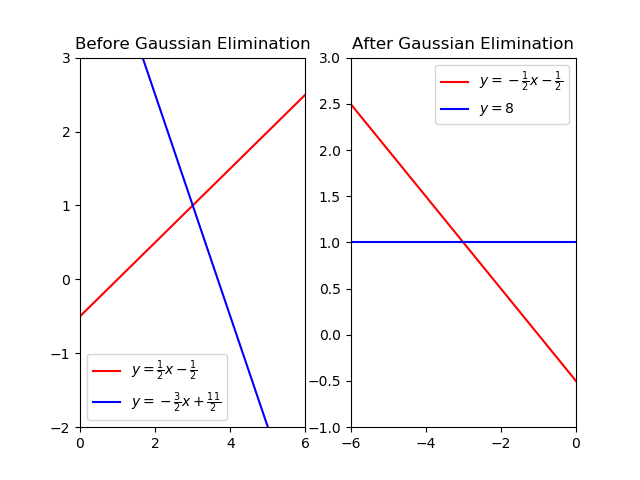

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'After Gaussian Elimination')

In [4]:
plt.subplot(1,2,1)

# Before gaussian elimination
ax1 = plt.subplot(1, 2, 1)

x = np.linspace(-1,6)
y1 = (x/2) - 0.5
y2 = (11/2) - (3*x/2)

ax1.plot(x, y1, color='r', label=r'$y=\frac{1}{2}x -\frac{1}{2}$')
ax1.plot(x, y2, color='b', label=r'$y=-\frac{3}{2}x +\frac{11}{2}$')
ax1.set_xlim(0,6)
ax1.set_ylim(-2,3)
ax1.legend()
ax1.set_title("Before Gaussian Elimination")

# Gaussian elimination
ax2=plt.subplot(1, 2, 2)

x = np.linspace(-6,0)
y12 = (-x/2) - 0.5
y22 = [1]*len(x)

ax2.plot(x, y12, color='r', label=r'$y=-\frac{1}{2}x-\frac{1}{2}$')
ax2.plot(x, y22, color='b', label=r'$y=8$')
ax2.set_xlim(-6,0)
ax2.set_ylim(-1,3)
ax2.legend()
ax2.set_title("After Gaussian Elimination")

# 3x3 case

In [5]:
A = np.array([[2, 4, -2],
              [4, 9, -3],
              [-2,-3, 7]])

b = np.array([2, 8, 10])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 2.  4. -2.]
 [ 0. -1. -1.]
 [ 0.  0.  4.]]

b = 
 [ 2. -4.  8.]



In [6]:
A = np.array([[1, 1, 1],
              [1, 2, 2],
              [1, 2, 3]])

b = np.array([6, 9, 10])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 1.  1.  1.]
 [ 0. -1. -1.]
 [ 0.  0.  1.]]

b = 
 [ 6. -3.  1.]



# Random matrices

In [7]:
A = np.random.rand(2,2)
b = np.random.rand(2)

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[2.82537790e-01 2.11610249e-01]
 [1.11022302e-16 1.37880391e-02]]

b = 
 [0.38672413 1.15212395]



# 100x100 random matrix

In [8]:
A = np.random.rand(100,100)
b = np.random.rand(100)

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 3.90442325e-02  9.02345290e-01  9.24564536e-02 ...  4.63768410e-01
   2.49581725e-02  4.72955542e-01]
 [ 0.00000000e+00  1.13167532e+01  1.12621567e+00 ...  5.74748940e+00
  -6.58293282e-01  5.20617864e+00]
 [ 0.00000000e+00  8.88178420e-16  5.71777855e-02 ... -2.57251012e-01
  -2.23309256e-01 -7.12051587e-01]
 ...
 [ 9.95690598e-16  8.29733024e-16  2.91623273e-16 ...  9.91474029e-01
   3.59635922e+00  9.90345260e+00]
 [-4.50745236e-15 -8.77114027e-15 -1.76165608e-15 ...  0.00000000e+00
  -2.17231963e+01 -5.56655061e+01]
 [ 8.18018322e-16  1.09575862e-14  3.73945322e-16 ... -0.00000000e+00
   0.00000000e+00  1.03453061e+01]]

b = 
 [ 4.58760527e-01  4.78783064e+00 -4.31218227e-02  1.20419225e-01
  4.00079418e-02  1.11827783e+00 -1.67976849e-01  1.57787224e+00
 -9.78151863e-01 -1.25295340e-01 -4.46725372e-01  9.86002401e-01
 -5.87714382e-01  1.57852838e+01 -3.77640940e+01 -5.09753518e+00
  9.87626706e-01 -2.04918799e-01  9.76482081e-01  1.71819310e+02
 -4.69173691e-01  2.177433

### Feeding an upper triangular matrix

In [9]:
A = np.array([[1,1,0], 
              [0,1,1], 
              [0,0,1]])

b = np.array([3, 5, 2])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 1.  1.  0.]
 [ 0. -1. -1.]
 [-0.  0.  1.]]

b = 
 [ 3. -5.  2.]



#### Our function works well with upper triangular matrices

### Feeding a lower triangular matrix

In [10]:
A = np.array([[1,0,0], 
              [1,1,0], 
              [1,1,1]])

b = np.array([2, 5, 3.2])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]

b = 
 [ 2.  -3.  -1.8]



#### Our function also does well when we feed it a lower triangular matrix.

# Elimination using Elementary matrices

In [11]:
def elementary_matrix_elimination(A, b):
    '''
    This function does matrix elimination by the use of elementary matrices.
    Returns an upper triangular matrix EA, the Eb vector, and the elimination matrix E. 
    Works only for nxn matrices with real elements.
    '''
    
    EA = A.copy()
    Eb = b.copy()
    matrix_len = len(EA)

    # A list containing all of the elementary matrices
    E_list = []

    for i in range(0, matrix_len-1):
        # Selects the pivot
        pivot = EA[i][i]

        for j in range(1+i, matrix_len):
            # Creates the elementary matrix with a -l (difference element)
            elementary_matrix = np.diag(np.ones(matrix_len))
            elementary_matrix[j][i] = -EA[j][i]/pivot

            # Appends the elementary matrix to E_list
            E_list.append(elementary_matrix)

            # Multiplies the elementary matrix to A and b
            EA = elementary_matrix @ EA
            Eb = elementary_matrix @ Eb

    # Computes for the elementary matrix E
    E = np.diag(np.ones(matrix_len))
    for i in range(0, len(E_list)):
        E = E_list[i] @ E
        

    return EA, Eb, E

In [12]:
A = np.array([[2,4,-2],
              [4,9,-3],
              [-2,-3,7]])

b = np.array([2,8,10])

EA, Eb, E = elementary_matrix_elimination(A, b)
print(EA, Eb, E, sep="\n\n")

[[ 2.  4. -2.]
 [ 0.  1.  1.]
 [ 0.  0.  4.]]

[2. 4. 8.]

[[ 1.  0.  0.]
 [-2.  1.  0.]
 [ 3. -1.  1.]]


In [13]:
A = np.array([[1,1,1],
              [1,2,2],
              [1,2,3]])

b = np.array([6,9,10])

EA, Eb, E = elementary_matrix_elimination(A, b)
print(EA, Eb, E, sep="\n\n")

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]

[6. 3. 1.]

[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]


In [14]:
# Pascal's triangle

A = np.array([[1,0,0,0],
              [1,1,0,0],
              [1,2,1,0],
              [1,3,3,1]]).astype(float)

b = np.array([0, 1, 2, 3])

EA, Eb, E = elementary_matrix_elimination(A, b)
print(EA, Eb, E, sep="\n\n")

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[0. 1. 0. 0.]

[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [-1.  3. -3.  1.]]


# Back substitution

In [15]:
def back_substitution(A, b):
    
    M = np.hstack((A, b.reshape((b.shape[0],1)))).astype(float)
    
    # Converting M to RREF
    for i in range(0, len(M)):
        M[i] = M[i] * (1/M[i][i])
    
    # Doing back substitution
    for i in range(0, len(M)-1):
        for j in range(i+1, len(M)):
            M[i] = M[i] - M[i][j]*M[j]
            
            
    A = M[:, 0:len(A)]
    b = M[:, len(A)]
    
    return A, b

### Example with elementary matrices

In [16]:
A = np.array([[1,1,1],
              [1,2,2],
              [1,2,3]])

b = np.array([6,9,10])

EA, Eb, E = elementary_matrix_elimination(A, b)
back_substitution(EA, Eb)

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([3., 2., 1.]))

### Example with forward elimination

In [17]:
A = np.array([[2, 4, -2],
              [4, 9, -3],
              [-2,-3, 7]])

b = np.array([2, 8, 10])

A, b = matrix_elimination(A, b)
back_substitution(A, b)

(array([[ 1.,  0.,  0.],
        [-0.,  1.,  0.],
        [ 0.,  0.,  1.]]), array([-1.,  2.,  2.]))

# Cases where elimination fails

### I. No solution

$x-2y=1$<br>
$3x-6y=11$

In [18]:
x = np.linspace(-3, 3)

y1 = x/2 - 0.5
y2 = x/2 - (11/6)

<IPython.core.display.Javascript object>


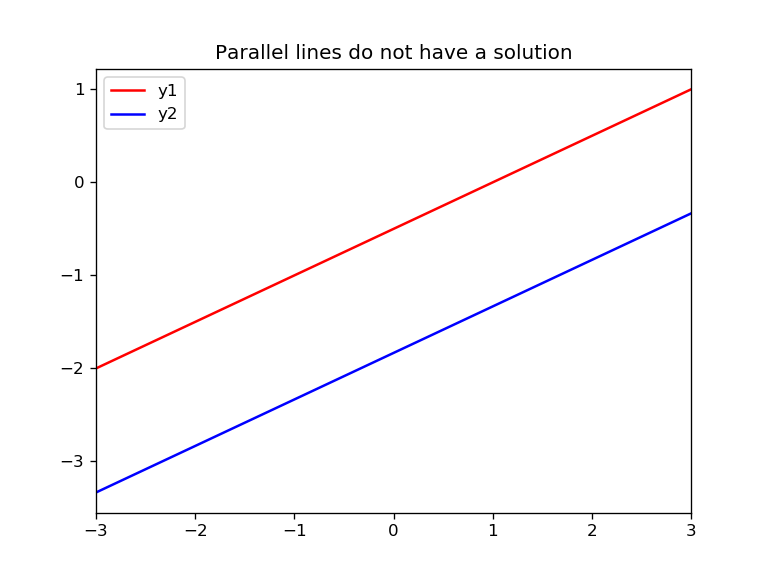

In [19]:
plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.xlim(-3,3)
plt.title('Parallel lines do not have a solution')
plt.legend()

### Testing it out

In [20]:
A = np.array([[1, -2],
              [3, -6]])

b = np.array([1, 11])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 1. -2.]
 [ 0.  0.]]

b = 
 [ 1. -8.]



### II. Infinitely many solutions

$x-2y=1$<br>
$3x-6y=3$

<IPython.core.display.Javascript object>


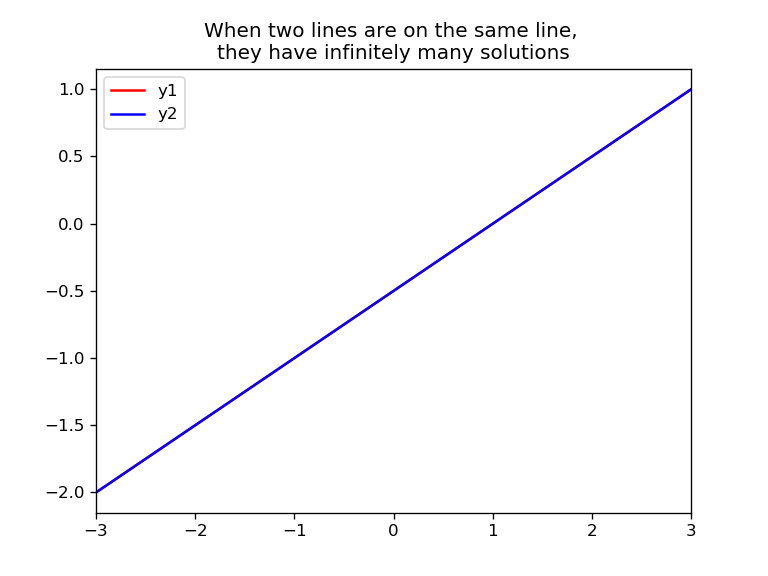

In [21]:
x = np.linspace(-3, 3)

y1 = x/2 - 0.5
y2 = x/2 - 0.5

plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.xlim(-3,3)
plt.title('When two lines are on the same line, \nthey have infinitely many solutions')
plt.legend()

### Testing it out

In [22]:
A = np.array([[1, -2],
              [3, -6]])

b = np.array([1, 3])

A, b = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')

A = 
 [[ 1. -2.]
 [ 0.  0.]]

b = 
 [1. 0.]



### III. Row exchange

Suppose we have the following system of equations:
<center>
$\begin{bmatrix}
    0 & 2 & 4 \\
    3 & -2 & 5
  \end{bmatrix}$
</center><br>
When we use matrix multiplication, there will be a division by zero because the pivot is zero.
To remedy this, we introduce a row exchange. To do a row exchange, we simply multiply the original matrix with a permutation matrix.

To exchange row 1 and row 2, we multiply it with:
<center>
$\begin{bmatrix}
    0 & 1 \\
    1 & 0
  \end{bmatrix}$
</center>

Permutation matrices are a little complicated to do. I will do it in the future.

In [23]:
def row_exchange(A, max_iter=1e6):
    '''
    The while loop should not stop shuffling g until diag(g) contains only non-zeros
    '''
    seed_value = 0
    while set(np.diag(A)!=0)!={True}:
        # The seed value acts as our number of iterations an is also fed to the seed function
        np.random.seed(seed_value)
        np.random.shuffle(A)

        '''
        We put in a different seed value after each iteration
        so that we can minimize repeated arrangements while our matrix
        '''

        seed_value+=1

        # If max iterations is reached, the while loop is stopped
        if seed_value==max_iter:
            print("Maximum iteration reached.")
            break
                
    return A

In [24]:
A = np.array([[0,1,0,0],
              [0,0,1,0],
              [1,0,0,0],
              [0,0,0,1]])

row_exchange(A)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [25]:
A = np.array([[0,1],
              [1,0]])

row_exchange(A)

array([[1, 0],
       [0, 1]])

In [26]:
A = np.array([[0, 2, 4],
              [3, -2, 5]])

row_exchange(A)

array([[ 3, -2,  5],
       [ 0,  2,  4]])

In [27]:
A = np.array([[0,1,0],
              [1,0,0],
              [0,0,1]])

row_exchange(A)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [28]:
A = np.array([[0,0,3,0],
              [4,0, 4,0],
              [3,-2,0,1]])

row_exchange(A)

array([[ 4,  0,  4,  0],
       [ 3, -2,  0,  1],
       [ 0,  0,  3,  0]])

# Forward elimination with row exchanges

In [29]:
def matrix_elimination_row_exchange(A, b):
    '''
    This function is for gaussian elimination. A matrix M of nxn size and a vector 
    of nx1 size is passed into the function. This function works for any nxn matrix
    with real elements.
    '''
    
    # Does a horizontal stack with matrix A an vector b. This is the Augmented matrix
    M = np.hstack((A, b.reshape((b.shape[0],1)))).astype(float)

    
    # If the diagonal of M contains zeros, we perform matrix row exchanges
    if True in (np.diag(M)==0):
        M = row_exchange(M)
        
        
    # Forward elimination
    for i in range(0, len(M)-1):
        # Gets the pivot
        pivot = M[i][i]
            
        for j in range(i+1, len(M)):
            # Computes for the multiplier
            multiplier = M[j][i] / pivot
            M[j] = multiplier*M[i] - M[j]
                
    # REF is an upper triangular matrix
    REF = M.copy()
    
    # If the i,ith item (belonging in the diagonal) is not 1, we make it 1 
    for i in range(0, len(M)):
        M[i] = M[i] * (1/M[i][i])
        
    # Reduced REF
    RREF = M.copy()
    
    # Back substitution
    for i in range(0, len(M)-1):
        for j in range(i+1, len(M)):
            M[i] = M[i] - M[i][j]*M[j]
                
    A = M[:, 0:len(A)]
    b = M[:, len(A)]
    
    # Returns an identity matrix, solution (b vector), and the REF matrix which is a triangular matrix
    return A, b, REF, RREF

In [30]:
A = np.array([[0, 1],
              [1,  0]])

b = np.array([5,10])

A, b, REF, RREF = matrix_elimination_row_exchange(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.]
 [-0.  1.]]

b = 
 [10.  5.]

REF = 
 [[ 1.  0. 10.]
 [ 0. -1. -5.]]

RREF = 
 [[ 1.  0. 10.]
 [-0.  1.  5.]]


In [31]:
A = np.zeros((3,3))

b = np.zeros(3)

matrix_elimination_row_exchange(A, b)

Maximum iteration reached.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


(array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]), array([nan, nan, nan]), array([[ 0.,  0.,  0.,  0.],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]]), array([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]]))

In [32]:
A = np.array([[3,-2, 0],
              [1, 4, 0],
              [7, 5, 0]])
b = np.array([4,6,3])

matrix_elimination_row_exchange(A, b)

Maximum iteration reached.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


(array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]),
 array([ nan,  nan, -inf]),
 array([[ 7.        ,  5.        ,  0.        ,  3.        ],
        [ 0.        , -3.28571429,  0.        , -5.57142857],
        [-0.        ,  0.        , -0.        ,  9.73913043]]),
 array([[ 1.        ,  0.71428571,  0.        ,  0.42857143],
        [-0.        ,  1.        , -0.        ,  1.69565217],
        [        nan,         nan,         nan,        -inf]]))

# Calculating $A^{-1}$ by Gaussian Elimination

The idea is that we make an augmented matrix of $\begin{bmatrix}
    A & I\\
\end{bmatrix}$ and use gaussian elimination until we reach $\begin{bmatrix}
    I & A^{-1}\\ \end{bmatrix}$.

In [33]:
def matrix_inverse(A):
    '''
    Computes the inverse of an nxn matrix.
    '''
    I = np.diag(np.ones(len(A)))
    
    # Augmented matrix
    M = np.hstack((A, I))
    m,n = M.shape
    
    # Forward elimination
    for i in range(0, m-1):
        # Gets the pivot
        pivot = M[i][i]

        for j in range(i+1, m):
            # Computes for the multiplier
            multiplier = M[j][i] / pivot
            M[j] = multiplier*M[i] - M[j]
            
            
    # Ensures that the elements in the diagonal are non-negative        
    for i in range(0, m):
        if M[i][i] < 0:
            M[i] *= -1

            
    # Back substitution
    for i, j in zip(reversed(range(1, m)), range(0, m)):
        #print("i = ", i, " j = ", j)
        for k in reversed(range(1, m-j)):
            #print("    k = ", k)
            multiplier = -M[k-1][i]/M[i][i]
            #M[k-1]
            M[k-1] = (multiplier*M[i]) + M[k-1]
        
        
    # Reduced row echelon form
    for i in range(0, len(M)):
        M[i] = M[i]/M[i][i]
    
    
    # Our augmented matrix becomes [I A_inv]
    inv = M[:,m:n]
    return inv

### Sanity Check

In [34]:
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

A_inv = matrix_inverse(A)
I = A @ A_inv
I.astype(int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

#### 2x2 matrix

In [35]:
A = np.array([[4,3],
              [3,2]])

A_inv = matrix_inverse(A)
A_inv

array([[-2.,  3.],
       [ 3., -4.]])

In [36]:
A_inv@A

array([[1., 0.],
       [0., 1.]])

#### 4x4 matrix

In [37]:
A = np.array([[1,0,0,1],
              [0,2,1,2],
              [2,1,0,1],
              [2,0,1,4]])

A_inv = matrix_inverse(A)
A_inv

array([[-2. , -0.5,  1. ,  0.5],
       [ 1. ,  0.5,  0. , -0.5],
       [-8. , -1. ,  2. ,  2. ],
       [ 3. ,  0.5, -1. , -0.5]])

In [38]:
A_inv@A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Pascal matrix

In [39]:
A = np.array([[1,0,0],
              [1,1,0],
              [1,1,1]])

A_inv = matrix_inverse(A)
A_inv

array([[ 1.,  0.,  0.],
       [-1.,  1.,  0.],
       [ 0., -1.,  1.]])

In [40]:
A_inv@A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### More matrices

In [41]:
A = np.array([[6,6],
              [6,0]])

A_inv = matrix_inverse(A)
A_inv

array([[ 0.        ,  0.16666667],
       [ 0.16666667, -0.16666667]])

In [42]:
(A_inv@A).astype(int)

array([[1, 0],
       [0, 1]])

In [43]:
A = np.array([[4,3],
              [8,7]])

A_inv = matrix_inverse(A)
A_inv

array([[ 1.75, -0.75],
       [-2.  ,  1.  ]])

In [44]:
A = np.array([[1,0,0,0],
              [1,1,0,0],
              [1,2,1,0],
              [1,3,3,1]])

A_inv = matrix_inverse(A)
A_inv

array([[ 1.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.],
       [ 1., -2.,  1.,  0.],
       [-1.,  3., -3.,  1.]])

In [45]:
A_inv@A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [46]:
A = np.array([[3,2,0,0],
              [4,3,0,0],
              [0,0,6,5],
              [0,0,7,6]])

A_inv = matrix_inverse(A)
A_inv

array([[ 3., -2.,  0.,  0.],
       [-4.,  3.,  0.,  0.],
       [ 0.,  0.,  6., -5.],
       [-0., -0., -7.,  6.]])

In [47]:
(A_inv@A).astype(int)

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [48]:
A = np.array([[5,0,0,0],
              [0,4,0,0],
              [0,0,3,0],
              [0,0,0,2]])

A_inv = matrix_inverse(A)
A_inv

array([[ 0.2       ,  0.        ,  0.        ,  0.        ],
       [-0.        ,  0.25      ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.33333333,  0.        ],
       [-0.        ,  0.        , -0.        ,  0.5       ]])

In [49]:
A_inv@A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Singular matrices

In [50]:
A = np.array([[4,3],
              [8,6]])

A_inv = matrix_inverse(A)
A_inv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


array([[ nan,  nan],
       [ inf, -inf]])

In [51]:
A = np.array([[6,6],
              [6,6]])

A_inv = matrix_inverse(A)
A_inv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


array([[ nan,  nan],
       [ inf, -inf]])

In [52]:
A = np.array([[1,1,1],
              [1,1,0],
              [1,1,1]])

A_inv = matrix_inverse(A)
A_inv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

# LU Factorization

LU factorization/decomposition produces a product of two triangular matrices from a square matrix A - one lower triangular and one upper triangular.
<center>
$A = LU$
</center>

In [53]:
def LU(A):
    EA = A.copy()
    matrix_len = len(EA)

    # A list containing all of the elementary matrices
    E_list = []

    for i in range(0, matrix_len-1):
        # Selects the pivot
        pivot = EA[i][i]

        for j in range(1+i, matrix_len):
            # Creates the elementary matrix with a -l (difference element)
            elementary_matrix = np.diag(np.ones(matrix_len))
            elementary_matrix[j][i] = -EA[j][i]/pivot

            # Appends the elementary matrix to E_list
            E_list.append(elementary_matrix)

            # Multiplies the elementary matrix to A and b
            EA = elementary_matrix @ EA
    
    
    # Our upper triangular matrix
    U = EA.copy()
    
    # Calculates the inverse for each elementary matrix
    E_inv_list = [matrix_inverse(i) for i in E_list]
    
    # Calculates for L
    L = np.diag(np.ones(matrix_len))
    for i in E_inv_list:
        L = L@i
        
    return L, U

### LU Examples

In [54]:
# Example 1

A = np.array([[2,1,0],
              [1,2,1],
              [0,1,2]])

L,U = LU(A)
L@U

array([[2., 1., 0.],
       [1., 2., 1.],
       [0., 1., 2.]])

In [55]:
# Example 2

A = np.array([[2, 8],
             [6, 29]])

L,U = LU(A)
L@U

array([[ 2.,  8.],
       [ 6., 29.]])

# LDU Factorization

D takes the diagonal of U as its own diagonal and the original U from LU factorization is normalized.

In [56]:
def LDU(A):
    L, U = LU(A)
    
    # D is just the diagonal of our initial U
    D = np.diag(np.diag(U))
    
    # Computes for U
    U = np.array([row/pivot for row, pivot in zip(U, np.diag(U))])
    
    return L, D, U

### LDU Examples

In [57]:
# Example 1

A = np.array([[2, 8],
             [6, 29]])

L,D,U = LDU(A)
print(L, D, U, sep='\n\n')

[[1. 0.]
 [3. 1.]]

[[2. 0.]
 [0. 5.]]

[[1. 4.]
 [0. 1.]]


In [58]:
L@D@U

array([[ 2.,  8.],
       [ 6., 29.]])

In [59]:
# Example 2

A = np.array([[2,1,0],
              [1,2,1],
              [0,1,2]])

L,D,U = LDU(A)
print(L, D, U, sep='\n\n')

[[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.         0.66666667 1.        ]]

[[2.         0.         0.        ]
 [0.         1.5        0.        ]
 [0.         0.         1.33333333]]

[[1.         0.5        0.        ]
 [0.         1.         0.66666667]
 [0.         0.         1.        ]]


In [60]:
L @ D @ U

array([[2., 1., 0.],
       [1., 2., 1.],
       [0., 1., 2.]])

In [64]:
# Symmetric matrix

A = np.array([[1,2],
              [2,7]])

L,D,U = LDU(A)
print(L, D, U, sep='\n\n')

[[1. 0.]
 [2. 1.]]

[[1. 0.]
 [0. 3.]]

[[1. 2.]
 [0. 1.]]


#### We see that $L$ is simply the transpose of $U$. 

$L = U^T$

In conclusion, doing LDU factorization on a symmetric matrix $M$ produces $M=LDL^T$ 

# Transposes

Suppose we have a matrix A

<center>
$A = \begin{bmatrix}
    1 & 2 & 3 \\
    0 & 0 & 4
  \end{bmatrix}$
</center><br>

To get the transpose of matrix A, we simply make the columns into rows.

<center>
$A^{T} = \begin{bmatrix}
    1 & 0 \\
    2 & 0 \\
    3 & 4
  \end{bmatrix}$
</center><br>

In [61]:
def transpose(A):
    '''
    This function returns the transpose of an mxn matrix
    '''
    m, n = A.shape
    
    A_transpose = np.array([A[:,i] for i in range(0, n)])
    
    return A_transpose

## mxn matrix

In [62]:
A = np.array([[1,2,3], 
              [0,0,4]])

transpose(A)

array([[1, 0],
       [2, 0],
       [3, 4]])

## Symmetric matrix

In [63]:
A = np.array([[1,7,3], 
              [7,4,-5],
              [3,-5,6]])

transpose(A)

array([[ 1,  7,  3],
       [ 7,  4, -5],
       [ 3, -5,  6]])

# Exercises

### 1. Find $(A^{-1})^T$ and $(A^T)^{-1}$

In [66]:
A = np.array([[1,0],
              [2,1]])

matrix_inverse(transpose(A))

array([[ 1., -2.],
       [-0.,  1.]])

In [67]:
transpose(matrix_inverse(A))

array([[ 1., -2.],
       [ 0.,  1.]])